In [ ]:
# !pip install numpy matplotlib pandas

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Load Image**

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #plt.axes('off')
  plt.imshow(img)
  plt.show()
  return img

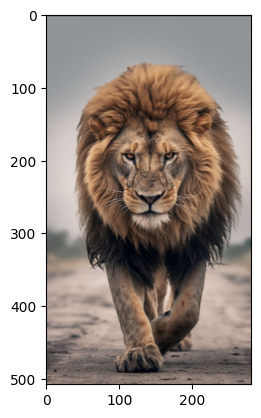

array([[[ 32,  33,  36],
        [ 32,  33,  36],
        [ 32,  33,  36],
        ...,
        [ 32,  33,  36],
        [ 32,  33,  36],
        [ 32,  33,  36]],

       [[ 32,  33,  36],
        [ 32,  33,  36],
        [ 32,  33,  36],
        ...,
        [ 32,  33,  36],
        [ 32,  33,  36],
        [ 32,  33,  36]],

       [[ 32,  33,  36],
        [ 32,  33,  36],
        [ 32,  33,  36],
        ...,
        [ 32,  33,  36],
        [ 32,  33,  36],
        [ 32,  33,  36]],

       ...,

       [[122, 109, 101],
        [115, 102,  94],
        [128, 116, 108],
        ...,
        [148, 133, 126],
        [144, 129, 122],
        [134, 120, 113]],

       [[124, 108, 100],
        [125, 110, 101],
        [147, 132, 123],
        ...,
        [142, 127, 121],
        [140, 126, 119],
        [125, 111, 104]],

       [[146, 128, 119],
        [159, 141, 132],
        [167, 149, 140],
        ...,
        [131, 118, 113],
        [137, 124, 118],
        [126, 113, 107]]], dtype=uint8)
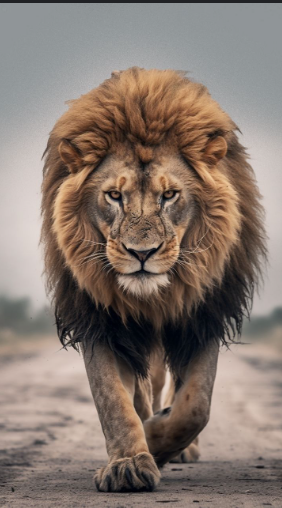

In [ ]:
filename = 'lion.png'
read_file(filename)

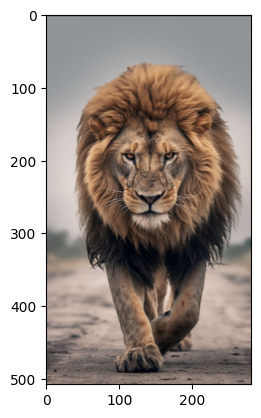

In [ ]:
img=read_file(filename)
org_img=np.copy(img)

**Create Edge Mask**

In [ ]:
def edge_mask(img, line_size, blur_value):
  #input: Input Image
  #Output: Edges of Images
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, line_size, blur_value)

  return edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
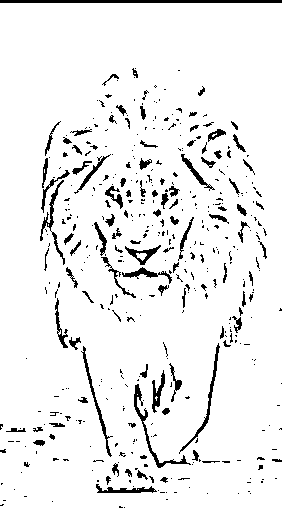

In [ ]:
line_size, blur_value=7,7
edge_mask(img, line_size, blur_value)

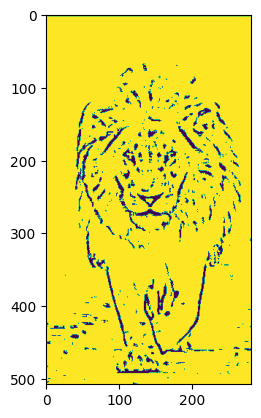

In [ ]:
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges)
plt.show()

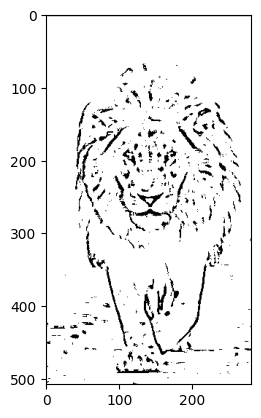

In [ ]:
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="gray")
plt.show()

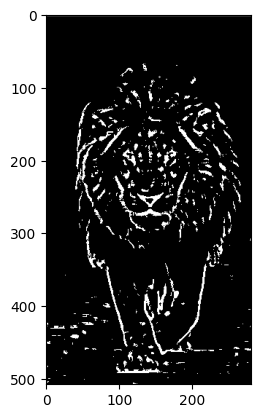

In [ ]:
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="binary")
plt.show()

**Reduce The Color Palette**

In [ ]:
def color_quantization(img,k):
  # transform the image
  data = np.float32(img).reshape((-1,3))
  # determine criteria
  criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
  # implementing K-Means
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

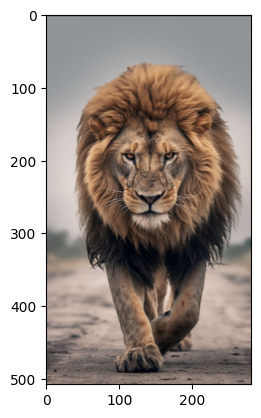

In [ ]:
img_quantize=color_quantization(img,k=2)
plt.imshow(img)
plt.show()

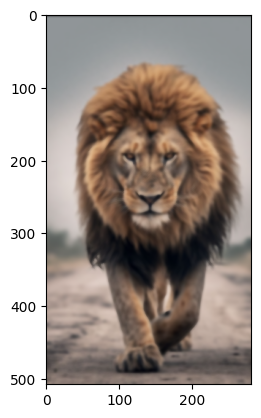

In [ ]:
#reduce the noise
blurred=cv2.bilateralFilter(img, d=7, sigmaColor=300, sigmaSpace=300)
plt.imshow(blurred)
plt.show()

**Combine Edge Mask with the quantize img**

In [ ]:
def cartoon():
  c=cv2.bitwise_and(blurred, blurred, mask=edges)

  plt.imshow(c)
  plt.title("cartoon_img")
  plt.show()

  plt.imshow(org_img)
  plt.title("original_img")
  plt.show()

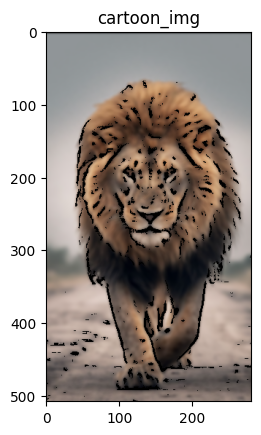

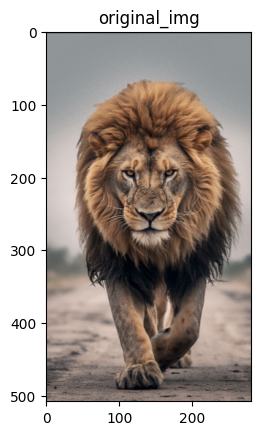

In [ ]:
cartoon()